### Utility functions

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def symbol_to_path(symbol, base_dir="../data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp= pd.read_csv(symbol_to_path(symbol), index_col= "Date", parse_dates= True, usecols=['Date', 'Adj Close'], na_values=['nan'])
       
        #rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
       
        df=df.join(df_temp) #use default left
        
        if symbol == 'SPY':
            df = df.dropna(subset=["SPY"])
            
    return df

def normalize_data(df):
    """Normalize stock prices using the first row of the dataframe"""
    return (df/df.iloc[0])

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

    
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    
    plot_data(df.loc[start_index:end_index,columns], title = "Selected Data")
    
    

In [3]:
def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01','2010-12-31') # the year 2010
    print (dates)
    print('******************')
            
    #Read in more stocks 
    symbols = ['GOOG',  'IBM', 'GLD']
    
    #Create an empty dataframe
    #df1= pd.DataFrame(index=dates)
    #print(df1)
    #print('******************')
    
    #Read SPY data into temporary dataframe
    #dfSPY = pd.read_csv("../data/SPY.csv", index_col= "Date", parse_dates= True, usecols=['Date', 'Adj Close'], na_values=['nan']) # date need to be set as index because to Join.
    
    #print(dfSPY.tail(10))
    #print('******************')
    
    #Join the two dataframes using DataFrame.join()
    #df1= df1.join(dfSPY, how= 'inner')
    #print(df1)
    #print('******************')
    
    #for symbol in symbols:
    #    df_temp= pd.read_csv("../data/{}.csv".format(symbol), index_col= "Date", parse_dates= True, usecols=['Date', 'Adj Close'], na_values=['nan'])
    #   
    #    #rename to prevent clash
    #    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    #    df1=df1.join(df_temp) #use default left
       
    
    # Get stock data
    df = get_data(symbols, dates)
        
    # Slice and plot
    
    # Slice by row range (dates) using DataFrame selector
    #print (df['2010-01-01':'2010-01-31']) # the month of January
    #print('******************')
    
    #Slice by column (symbols)
    #print(df['GOOG']) #a single label selects a single column
    #print('******************')
    
    #print(df[['IBM', 'GLD']]) # a list of labels selects multiple columns      
    #print('******************')       
    
    #Slice by row and column 
    #print (df.loc['2010-03-10':'2010-03-15',['SPY','IBM']])
    
    #print('*********Selected Plot***********')
    #df= plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')
    
    # Normalize
    print('*********Before Normalization***********')
    plot_data(df)
    
    print('*********After Normalization***********')
    plot_data(normalize_data(df))
    
    
  

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')
******************
*********Before Normalization***********


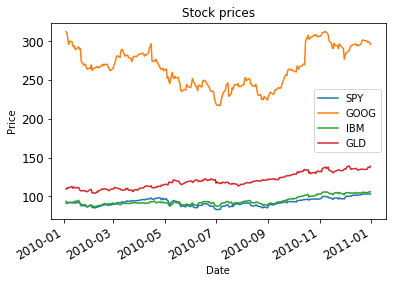

*********After Normalization***********


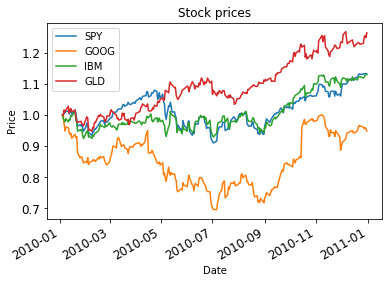

In [4]:
test_run()